@Author: Ben Funk
TODO: Look at calibrating each sensor before analyzing the data

In [1]:
# Relevant libraries
import pandas as pd
import scipy.optimize as sc
import scipy.stats as st
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import f
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt



In [5]:
# Load data from CSV file
file2 = pd.read_csv("./../Output/FullVOMatrix.csv")
# Extract the columns from the data
#file2=file2[file2['Target PPM']<=500]

file2=file2[file2['Target PPM']!=150]
#file2=file2[file2['SensorID']==7]
#file2=file2[file2['Target PPM']!=50]
#file2=file2[file2['SensorID']==7]
xDataResistance = file2.loc[:, 'Resistance']
xDataRatio = file2.loc[:, 'Ratio']
xDataRH = file2.loc[:, 'RelativeHumidity']
xDataTemp = file2.loc[:, 'Temperature']
yDataTargetPPM = file2.loc[:, 'Target PPM'] + 4.16

#calculate absolute humidity in g/m^3
e_sat_standard = 6.112 * np.exp((17.67 * xDataTemp) / (xDataTemp + 243.5))
actual_pressure = xDataRH * e_sat_standard
xDataAH = (18.02*actual_pressure)/(100*(xDataTemp+ 273.15)*0.08314)
file2['ActualHumidity'] = xDataAH

# Separate the independent and dependent variables
X = file2.drop('Target PPM', axis='columns')
y = file2.loc[:, 'Target PPM']

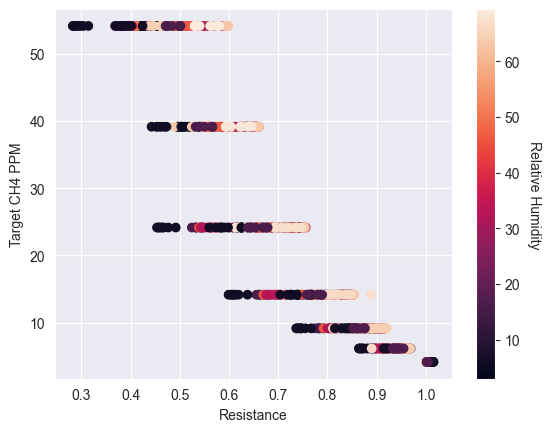

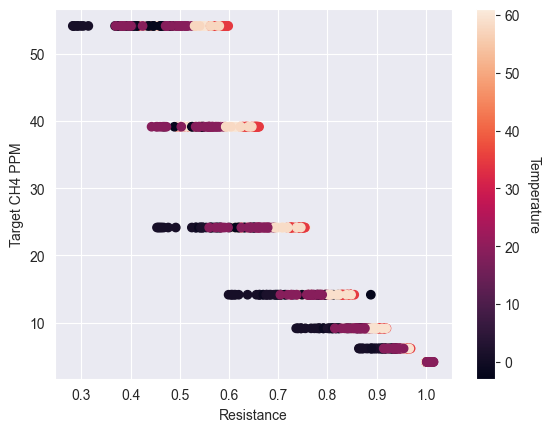

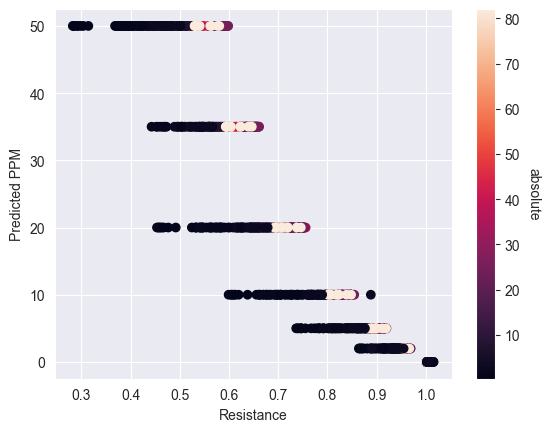

In [6]:
df = file2
# code to show data with relative humidity
scatter = plt.scatter(df.loc[:, 'Resistance'], yDataTargetPPM, c=xDataRH)
plt.xlabel("Resistance")
plt.ylabel('Target CH4 PPM')
cbar = plt.colorbar(scatter)
cbar.set_label('Relative Humidity', rotation=270, labelpad=15)
plt.show()

scatter = plt.scatter(df.loc[:, 'Resistance'],yDataTargetPPM, c=xDataTemp)
plt.xlabel("Resistance")
plt.ylabel('Target CH4 PPM')
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature', rotation=270, labelpad=15)
plt.show()


# code to show data with absolute humidity
scatter = plt.scatter(df.loc[:, 'Resistance'], df.loc[:, "Target PPM"], c=xDataAH)
plt.xlabel("Resistance")
plt.ylabel('Predicted PPM')
cbar = plt.colorbar(scatter)
cbar.set_label('absolute', rotation=270, labelpad=15)
plt.show()

 Funk Equation
a*R+b
a*np.exp(-1*R*b+c)+d
a*R**b+c
a*R**b+c*H*(a*R**b+c)+d  (Basically Bastviken)  12.537318798342179
(a*np.exp(-1*R*b+c)+d)+f*H*(a*np.exp(-1*R*b+c)+d)+g
a*np.exp(-1*R*b+c)+d*np.exp(-1*H*f+g)+h (Funk Equation)
a*np.exp((-1*R*b+c)+(-1*H*d+e))+f 4.2
                                                          W/1000  W/500   UV500   UV1000
a**((-1*R*b+c)+(-1*H*d+e))+f 6.4                          87.79   42.64   62.74   116.35
a**((-1*R*b)+(-1*H*c)+d)+e   6.5                          87.79

a**((((-1*R)/(H**b))*c)+(-1*H*d)+e)+f 7.1                 74.09   35.76   62.37   113.46


a**((((-1*R)/(H**b))*c)+(-1*H*d)+(-1*T*e)+f)+g 8.1
a**((((-1*R)/(H**b))*c)+(-1*H*d)+(-1*T*e)+(((-1)/(T*f*H**g))*h)+i)+j 8.2
a**((((-1*R)/(H**b))*c)+(-1*H*d)+(-1*T*e)+(((-1*T*f)/(H**g))*h)+i)+j 8.3                           5.764

a**((((-1*R)/(H**b))*c)+(-1*H*d)+(-1*T*e)+(((-1*T*f)/(H**g))*h)+i)+j*np.exp(-1*T*k)+l 9.1


0.97**((((-1*R)/(H**(-0.66)))*c)+(-1*H)+(1.21*T)+(((-1.22*T)/(H**0.23))*1.25)+-178.26)+j            5.865


6.33 a ** ( (-1*R**(p) / (H ** b)) * c + d) * e ** (-1 * H * f + g) * h ** (-1 * T * i + j) \
               * k ** (-1*R*(1/(T*l))*m+n) + o

6.18 a ** ( (-1*R**(p) / (H ** b)) * c + d) * e ** (-1 * H * f + g) * h ** (-1 * T * i + j) \
               * k ** (-1*R*(1/(T*l))*m+n) + o*np.log(H) +q

5.75 a ** ( (-1*R**(p) / (H ** b)) * c + d) * e ** (-1 * H * f + g) * h ** (-1 * T * i + j) \
               * k ** (-1*R*(1/(T*l))*m+n) + o*(R*T) +q



/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_7992/2289774068.py:16: RuntimeWarning: divide by zero encountered in divide
  stuff = a**((((-1*R)/(H**b))*c)+(-1*H*d)+(-1*T*e)+(((-1*T*f)/(H**g)))+h) + i


a = 0.512211 b = -404.321047 c = -8312.936627 d = -164.682310 e = 10.071607 f = 0.000000 g = 18.121374 h = 26.279807 i = 15.980907
16.987077316789815


/Users/benfunk/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_7992/2289774068.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:,'Predicted PPM'] = y_pred
/var/folders/1g/qs1wt1d52t1fp_9wj2_z6vlr0000gn/T/ipykernel_7992/2289774068.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

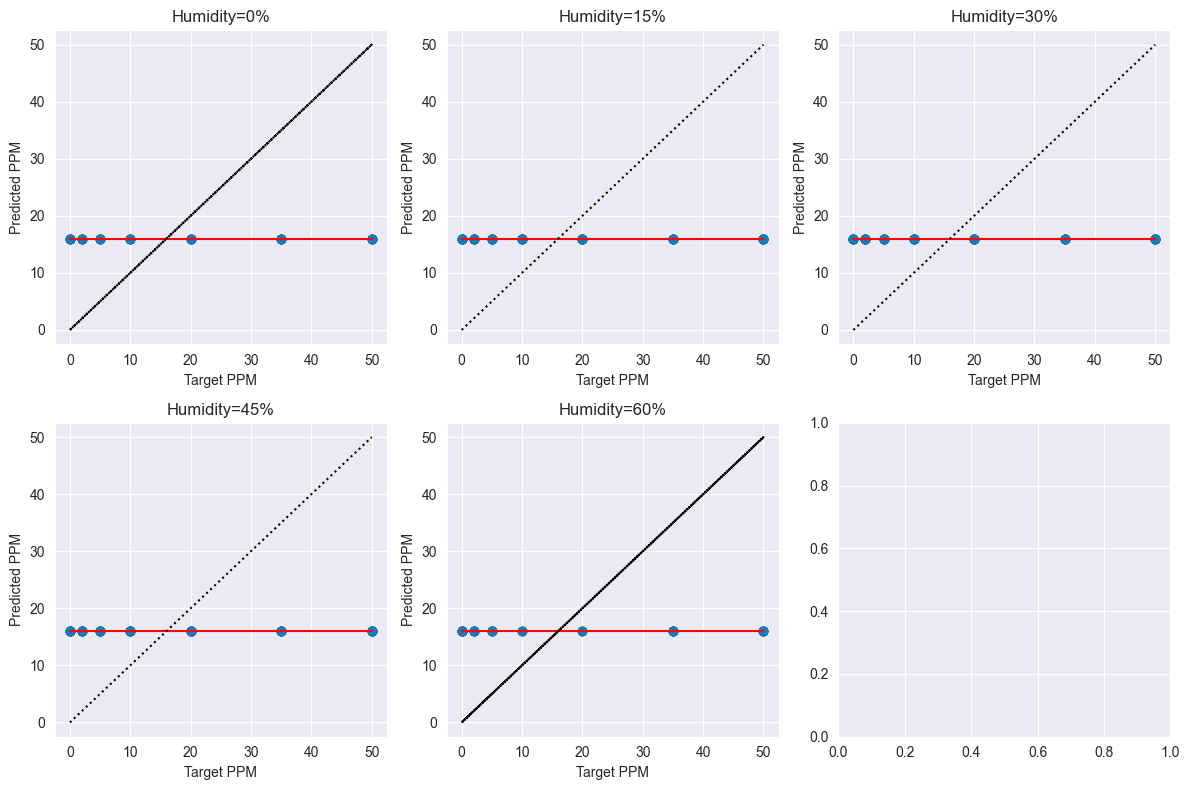

In [8]:
"""Keep this import here. It is the only way to run this cell and not have it break. If it is not here, you have to run all cells above before you run this every single time. I dont know why it does this but that is the one way ive found to fix it"""
import scipy.optimize as sc
# (a + b*R + c*H + d*T + e*np.log(R) + f*np.log(H) + g*np.log(T) +
# h*(R*T) + i*np.log(R*T) + j*(R/T) + k*(T/R) +
# l*(R*H) + m*(H*T) + n*(R*T*H))

# a*R**b+c*H*(a*R**b+c)+d  (Bastviken)  12.537318798342179
# a ** ((((-1 * R) / (H ** b)) * c) + (-1 * H * d) + (-1 * T * e) + (((-1 * T*f) / (H ** g)) * h) + i) + j 5.877637558035431



# a ** ( (-1*R**(b) * (H ** c)) * d + e) * f ** (-1 * H * g + h) * i ** (-1 * T * j + k) * l ** (-1*R*(1/(T*m))*n+o) +p
def funkEQ(X, a, b, c, d, e, f, g, h, i):
    R, H, T = X
    with np.errstate(over='ignore'):
        stuff = a**((((-1*R)/(H**b))*c)+(-1*H*d)+(-1*T*e)+(((-1*T*f)/(H**g)))+h) + i
    return stuff

#p0 = [1] * 9
p0 = [0.934169,-0.326373,-3.631332, 0.004898, 0.376844, 0.931643, 1.150201, -76.285530, -1.730073]

def residual(params, X, y):
    return np.sum((y - funkEQ(X, *params))**2)

# Perform curve fitting using the funct function, xDataResistance, and yDataTargetPPM data
# Set the maximum number of function evaluations to 1000000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

popt, pcov = sc.curve_fit(funkEQ, (X_train['Resistance'], X_train['ActualHumidity'], X_train['Temperature']), y_train, p0, maxfev=1000000)

param_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l','m','n','o','p','q','r','s','t','u','v','w']
print(' '.join(f'{name} = {value:.6f}' for name, value in zip(param_names, popt)))


#########
# Getting RMSE of Equation
#########

R_test = X_test['Resistance']
H_test = X_test['ActualHumidity']
T_test = X_test['Temperature']
# Generate the predictions using the optimized parameters and the input data
y_pred = funkEQ((R_test, H_test, T_test), *popt)

# Calculate the mean squared error
testVal = mean_squared_error(y_test, y_pred, squared=False)
print(testVal)

#########
# All the code needed to display predicted vs actual graphs
#########

from scipy.stats import t

# Degrees of freedom
df = len(yDataTargetPPM) - len(popt)

# Student's t value for the 95% confidence level
t_val = t.ppf(1-0.05/2, df)

# Compute the standard error of the parameters
perr = np.sqrt(np.diag(pcov))

# Compute the standard error of the predictions
def predict_std(X, popt, perr):
    jac = np.array([funkEQ(X, *popt[:i], 1 if j == i else 0, *popt[i+1:]) for i,j in enumerate(range(len(popt)))]).T
    return np.sqrt(np.sum((jac * perr) ** 2, axis=1))

# Compute the 95% confidence intervals for the predicted values
predict_std_val = predict_std((R_test, H_test, T_test), popt, perr)
conf_int_lower = y_pred - t_val * predict_std_val
conf_int_upper = y_pred + t_val * predict_std_val

# break up the points by humidity percentage to show more accurate graphs
humidity_values = [0, 15, 30, 45, 60]  # Updated humidity values

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # Create a 2x3 grid of subplots for 5 humidities

# Flatten the axs array in case it's 2D
axs = axs.flatten()

for i, H in enumerate(humidity_values):
    # Filter the data for the given humidity value
    mask = (file2['RelativeHumidity'] >= H - 5) & (file2['RelativeHumidity'] <= H + 5)
    df_filtered = file2.loc[mask]

    xDataResistance1 = df_filtered.loc[:, 'Resistance']
    xDataRH1 = df_filtered.loc[:, 'RelativeHumidity']
    xDataTemp1 = df_filtered.loc[:,'Temperature']
    yDataTargetPPM1 = df_filtered.loc[:, 'Target PPM']
    xDataAH1 = df_filtered.loc[:, 'ActualHumidity']

    y_pred = funkEQ((xDataResistance1, xDataAH1, xDataTemp1), *popt)
    df_filtered.loc[:,'Predicted PPM'] = y_pred

    # Create a scatter plot
    sc = axs[i].scatter(yDataTargetPPM1, y_pred, alpha=.5)

    # Calculate mean prediction for each target PPM and plot it
    mean_pred_per_target_ppm = df_filtered.groupby('Target PPM')['Predicted PPM'].mean()
    axs[i].plot(mean_pred_per_target_ppm.index, mean_pred_per_target_ppm.values, color='r')

    # Add a linear dotted line
    axs[i].plot(yDataTargetPPM1, yDataTargetPPM1, 'k:')

    axs[i].set_xlabel('Target PPM')
    axs[i].set_ylabel('Predicted PPM')
    axs[i].set_title(f'Humidity={H}%')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


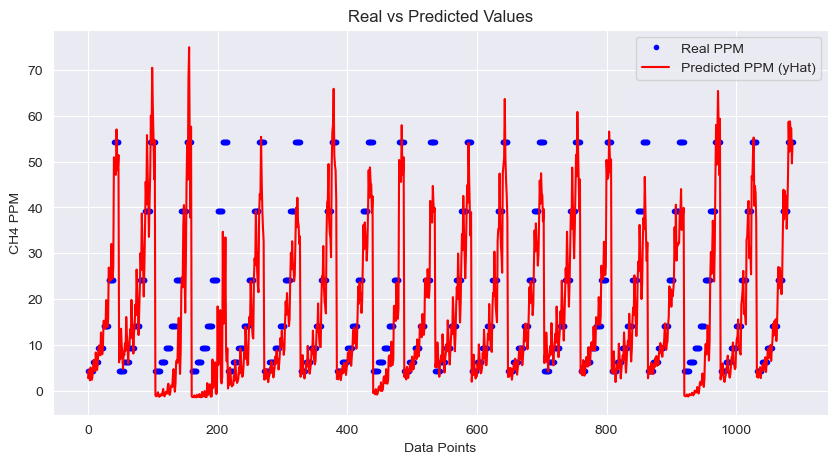

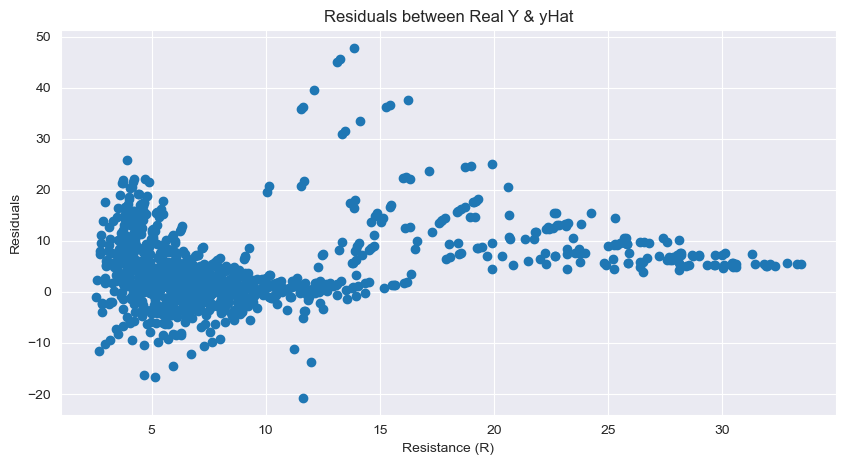

In [22]:
# Extract the X values for the curve fitting
X_values = (xDataResistance, xDataAH, xDataTemp)

# Compute the predicted y values using the optimized parameters
yHat = funkEQ(X_values, *popt)

# Extract the real y values from your data
realY = file2.loc[:, 'Target PPM']+4.21

# Compute the residuals
residual = realY - yHat

# Plot the real and predicted y values
plt.figure(figsize=(10, 5))
plt.plot(realY, 'b.', label='Real PPM')
plt.plot(yHat, 'r-', label='Predicted PPM (yHat)')
plt.xlabel('Data Points')
plt.ylabel('CH4 PPM')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.scatter(xDataResistance, residual)
plt.xlabel('Resistance (R)')
plt.ylabel('Residuals')
plt.title('Residuals between Real Y & yHat')
plt.show()


R-squared:  0.8276670114059531


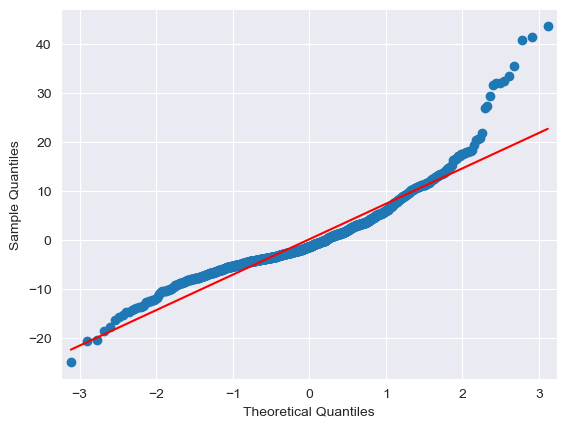

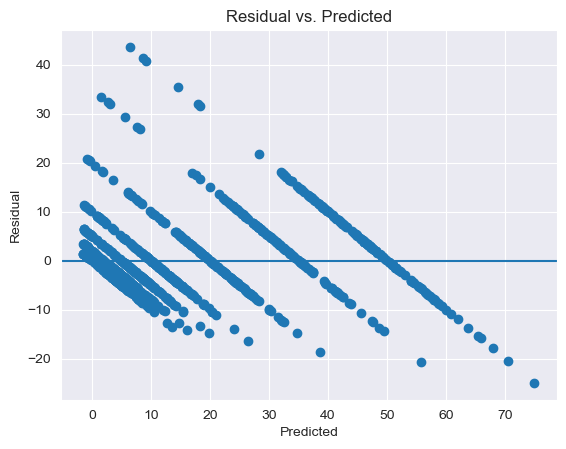

F-statistic: 647.7667977217111
p-value: 0.0


In [23]:
xDataResistance = file2.loc[:, 'Resistance']
xDataRatio = file2.loc[:, 'Ratio']
xDataRH = file2.loc[:, 'RelativeHumidity']
xDataTemp = file2.loc[:, 'Temperature']
yDataTargetPPM = file2.loc[:, 'Target PPM']

# Separate the independent and dependent variables
X = file2.drop('Target PPM', axis='columns')
y = file2.loc[:, 'Target PPM']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = funkEQ((xDataResistance, xDataAH, xDataTemp), *popt)
print('R-squared: ', r2_score(y, y_pred))

# Calculate residuals
residuals = y - y_pred

# Reshape your input data to fit the het_breuschpagan function requirements
exog = np.vstack((xDataResistance, xDataAH, xDataTemp)).T

# QQ Plot
sm.qqplot(residuals, line='s')
plt.show()

# Residual vs. Predicted plot
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# First compute the various sum of squares
SST = np.sum((yDataTargetPPM - np.mean(yDataTargetPPM)) ** 2)
SSE = np.sum(residuals ** 2)
SSR = SST - SSE

# Then compute the degree of freedoms
df1 = len(popt) - 1  # number of parameters in your model - 1
df2 = len(yDataTargetPPM) - len(popt)  # number of observations - number of parameters

# Then compute the mean square values
MSR = SSR / df1
MSE = SSE / df2

# Finally compute the F-statistic and the associated p-value
F = MSR / MSE
p_value = f.sf(F, df1, df2)

print('F-statistic:', F)
print('p-value:', p_value)


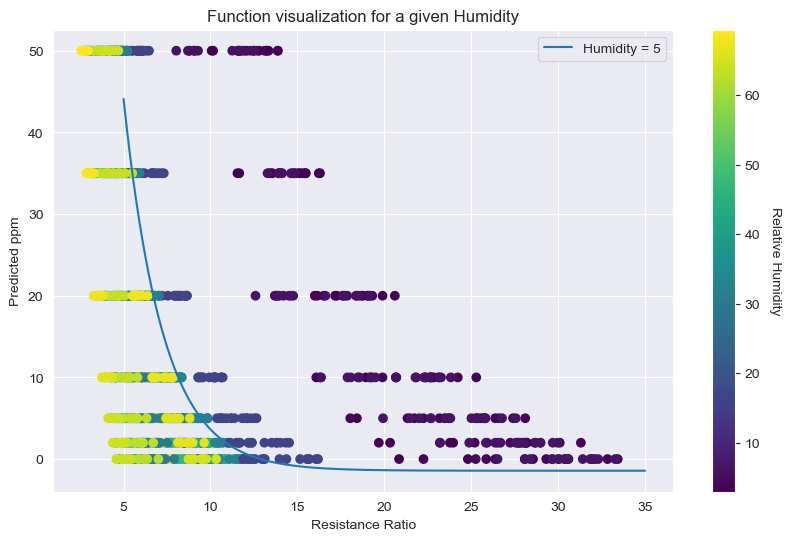

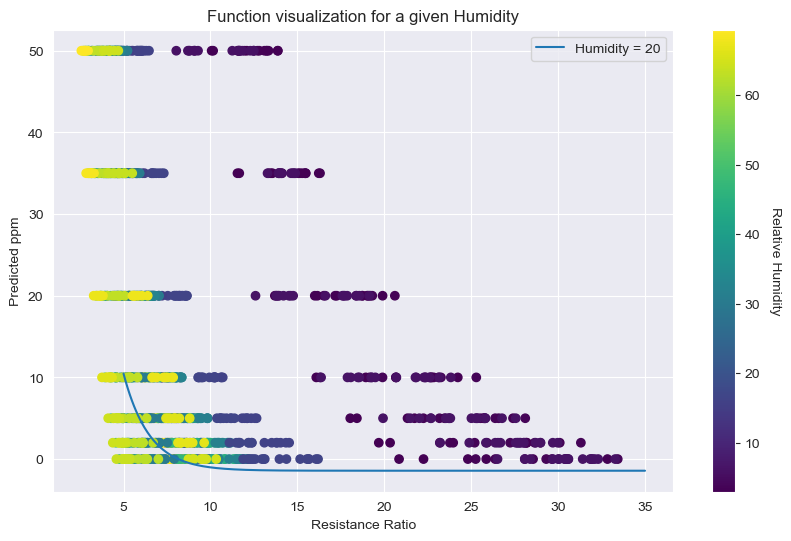

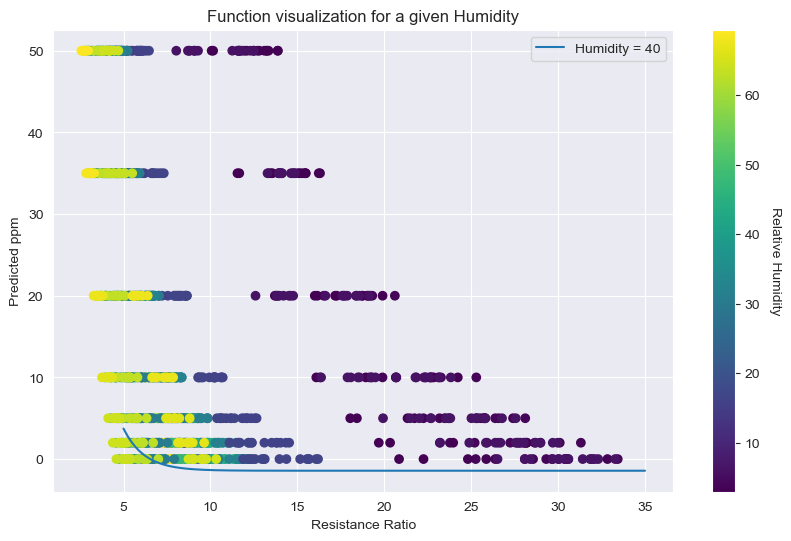

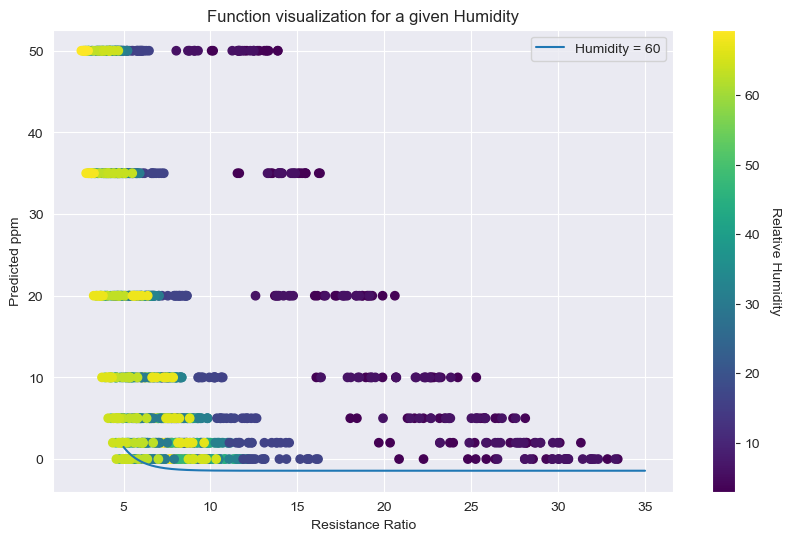

In [25]:
df=file2
# Define colors based on 'RelativeHumidity' column
colors = df.loc[:, 'RelativeHumidity']
R = np.linspace(5, 35, num=500)
for H in [5,20,40,60]:
    # calculate function values
    y_values = [funkEQ((r, H, 20), *popt) for r in R]

    # plotting
    plt.figure(figsize=(10,6))
    scatter = plt.scatter(df.loc[:, 'Resistance'], df.loc[:, "Target PPM"], c=colors, cmap='viridis')
    plt.plot(R, y_values, label=f'Humidity = {H}')
    plt.xlabel('Resistance Ratio')
    plt.ylabel('Predicted ppm')
    plt.title('Function visualization for a given Humidity')
    plt.legend()
    plt.grid(True)

    # Create colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Relative Humidity', rotation=270, labelpad=15)

    plt.show()


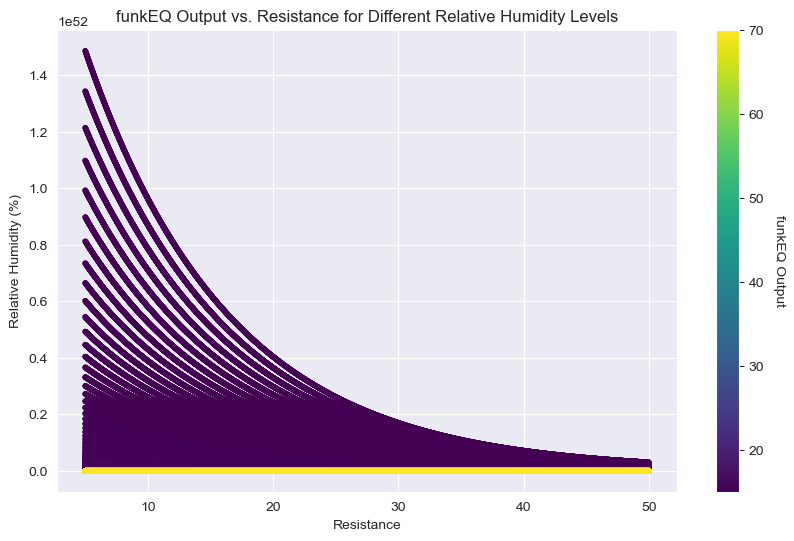

In [36]:

resistance = np.linspace(5, 50, 5000)  # Resistance from 2 to 50
relative_humidity_levels = np.linspace(15, 70, 5000)  # Relative Humidity from 0 to 70%

plt.figure(figsize=(10, 6))

# Preparing data for heatmap-like plot
funkEQ_outputs = np.zeros((len(relative_humidity_levels), len(resistance)))

for i, H in enumerate(relative_humidity_levels):
    e_sat_standard = 6.112 * np.exp((17.67 * 20) / (20 + 243.5))
    actual_pressure = H * e_sat_standard / 100
    AH = (18.02 * actual_pressure) / (100 * (20 + 273.15) * 0.08314)
    funkEQ_outputs[i, :] = [funkEQ((r, AH, 20), *popt) for r in resistance]

# Plotting heatmap-like plot using scatter
X, Y = np.meshgrid(resistance, relative_humidity_levels)
scatter = plt.scatter(X.ravel(), funkEQ_outputs.ravel(), c=Y.ravel(), cmap='viridis', marker='.')

# Labels and title
plt.xlabel('Resistance')
plt.ylabel('Relative Humidity (%)')
plt.title('funkEQ Output vs. Resistance for Different Relative Humidity Levels')

# Create colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('funkEQ Output', rotation=270, labelpad=15)

plt.show()


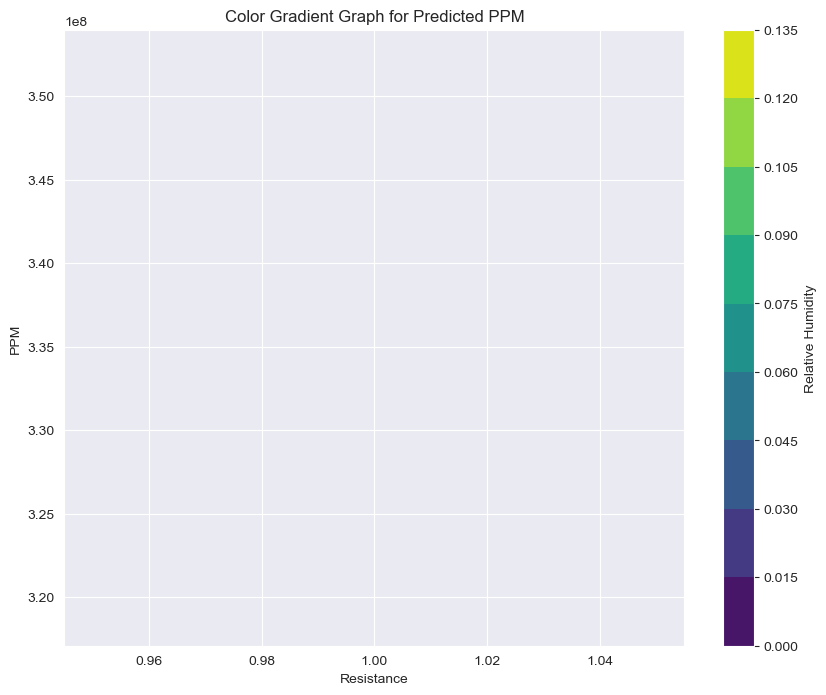

In [37]:
resistance_range = np.linspace(1, 30, 1000)  # 10000 points between 0 and 1000
rh_range = np.linspace(1, 70, 1000)  # 10000 points between 0 and 100

e_sat_standard = 6.112 * np.exp((17.67 * 20) / (20 + 243.5))
actual_pressure = rh_range * e_sat_standard / 100
AH = (18.02 * actual_pressure) / (100 * (20 + 273.15) * 0.08314)

# Create a grid of Resistance and RelativeHumidity values
resistance_values, rh_values = np.meshgrid(resistance_range, AH)

# Compute predicted PPM for all combinations of Resistance and RelativeHumidity
pred_ppm = funkEQ((resistance_values, rh_values,20), *popt)

# Create a color gradient graph
plt.figure(figsize=(10, 8))
plt.contourf(resistance_values, pred_ppm, rh_values, cmap='viridis')
plt.colorbar(label='Relative Humidity')
plt.xlabel('Resistance')
plt.ylabel('PPM')
plt.title('Color Gradient Graph for Predicted PPM')
plt.show()
